### Práctica 3 Grupo 1
Aprendizaje automático I - Regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
datos = pd.read_csv('tiempos-small.csv', sep=';')
datos.head()

,P1,P2,P3,Meta
0,385,514,636,703
1,408,556,674,738
2,419,580,728,803
3,425,579,729,800
4,453,619,766,863


In [ ]:
datos.describe()

,P1,P2,P3,Meta
count,268.000000,268.000000,268.000000,268.000000
mean,451.731343,626.656716,787.544776,869.570896
std,81.162496,121.362095,158.361395,176.471254
min,274.000000,362.000000,447.000000,491.000000
25%,395.000000,545.000000,683.000000,754.000000
50%,445.000000,616.000000,773.000000,849.000000
75%,507.000000,707.250000,884.750000,974.000000
max,703.000000,1001.000000,1278.000000,1398.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P1      268 non-null    int64
 1   P2      268 non-null    int64
 2   P3      268 non-null    int64
 3   Meta    268 non-null    int64
dtypes: int64(4)
memory usage: 8.5 KB


Obtener X e y a partir del dataframe

In [ ]:
X = datos.iloc[:,:-1].values
y = datos.iloc[:,-1].values

Regresión lineal

In [ ]:
regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

In [ ]:
regr.coef_

array([ 0.05070608, -0.50931134,  1.47297266])

In [ ]:
regr.intercept_

5.796813956606343

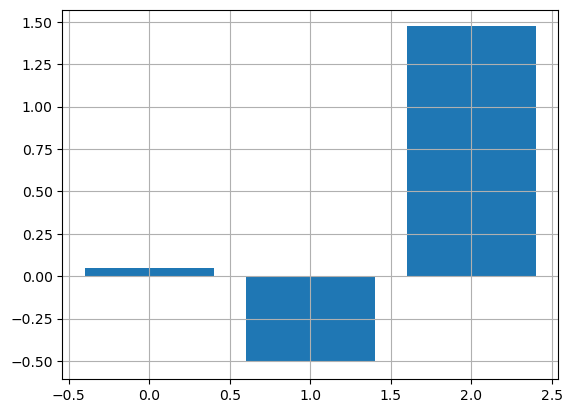

In [ ]:
x = [0,1,2]
plt.bar(x, regr.coef_)
plt.grid()
plt.show()

Representación de relación con diagrama de dispersión

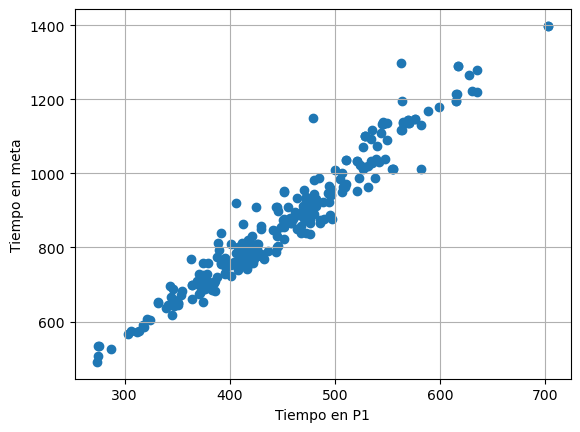

In [ ]:
plt.scatter(X[:,0],y)
plt.xlabel('Tiempo en P1')
plt.ylabel('Tiempo en meta')
plt.grid()
plt.show()

Representar el tiempo en meta con respecto a los tres de paso

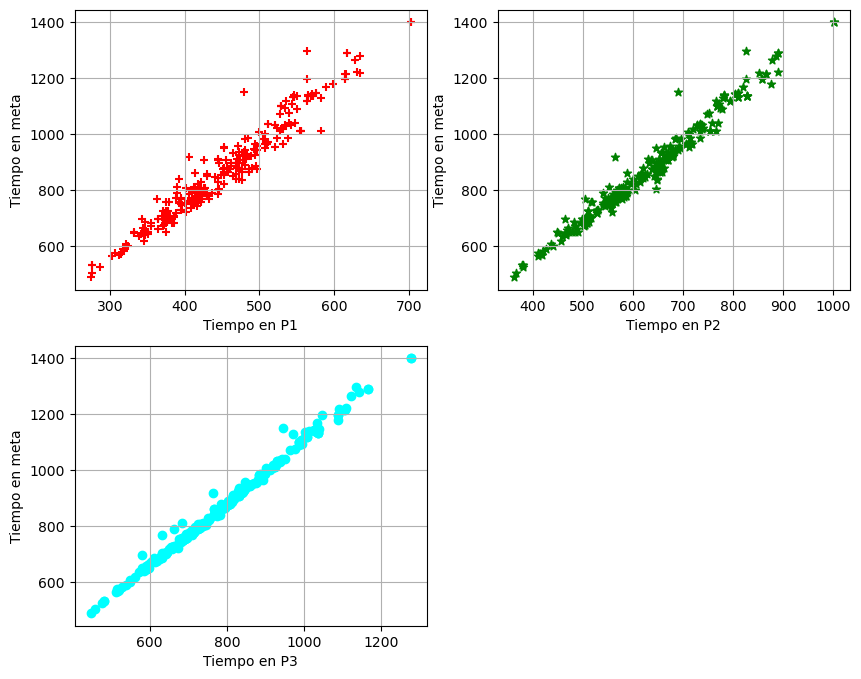

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(X[:,0],y, c='red', marker='+')
plt.xlabel('Tiempo en P1')
plt.ylabel('Tiempo en meta')
plt.grid()
plt.subplot(2,2,2)
plt.scatter(X[:,1],y, c='green', marker='*')
plt.xlabel('Tiempo en P2')
plt.ylabel('Tiempo en meta')
plt.grid()
plt.subplot(2,2,3)
plt.scatter(X[:,2],y, c='cyan', marker='o')
plt.xlabel('Tiempo en P3')
plt.ylabel('Tiempo en meta')
plt.grid()


Estimación del tiempo en meta por regresión lineal

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1234)

In [ ]:
regr = LinearRegression()
resultados = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    error = mean_squared_error(y_test, y_pred, squared=False)
    print(f'RMSE: {error:.1f}')
    resultados.append(error)
print(resultados)


RMSE: 9.9
RMSE: 11.6
RMSE: 16.0
RMSE: 15.4
RMSE: 12.2
RMSE: 16.1
RMSE: 14.9
RMSE: 13.7
RMSE: 17.6
RMSE: 12.8
[9.919800928884188, 11.60972900734092, 16.008479938709986, 15.407508096699383, 12.157145824730367, 16.059521897505867, 14.931547894210707, 13.704656577051527, 17.606571231115907, 12.759146999410175]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
error = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {error:.1f}')

RMSE: 12.8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1234)
regr = LinearRegression()
for punto in range(3):
    regr.fit(X_train[:,punto].reshape(-1,1), y_train)
    y_pred = regr.predict(X_test[:,punto].reshape(-1,1))
    error = mean_squared_error(y_test, y_pred, squared=False)
    print(f'Error utilizando el punto P{punto+1}: {error:.1f}')


Error utilizando el punto P1: 34.9
Error utilizando el punto P2: 20.5
Error utilizando el punto P3: 8.1


In [ ]:
diferencia = np.abs(y_pred - y_test)
print(f'Diferencia máxima: {np.amax(diferencia):.1f}')
print(f'Diferencia mínima: {np.amin(diferencia):.1f}')

Diferencia máxima: 24.5
Diferencia mínima: 0.4
